In [1]:
# prompt: generate a random data set for house price prediuction

import numpy as np
import pandas as pd

# Generate a random dataset
np.random.seed(42) # for reproducibility
n_samples = 1000

# Features
square_feet = np.random.randint(500, 5000, n_samples)
number_of_bedrooms = np.random.randint(1, 6, n_samples)
number_of_bathrooms = np.random.randint(1, 4, n_samples)
year_built = np.random.randint(1900, 2023, n_samples)
location_score = np.random.rand(n_samples) * 10 # Score from 0 to 10 for desirability

# Target variable (House Price)
# Simple model: price is influenced by features with some noise
price = (
    square_feet * 150 +
    number_of_bedrooms * 10000 +
    number_of_bathrooms * 7000 +
    (2023 - year_built) * -500 + # Newer houses are more expensive
    location_score * 5000 +
    np.random.randn(n_samples) * 50000 # Add some noise
)

# Ensure prices are not negative
price[price < 50000] = 50000

# Create a Pandas DataFrame
data = pd.DataFrame({
    'SquareFeet': square_feet,
    'NumberOfBedrooms': number_of_bedrooms,
    'NumberOfBathrooms': number_of_bathrooms,
    'YearBuilt': year_built,
    'LocationScore': location_score,
    'Price': price
})

# Display the first few rows
print(data.head())

# Display some basic statistics
print(data.describe())

   SquareFeet  NumberOfBedrooms  NumberOfBathrooms  YearBuilt  LocationScore  \
0        1360                 2                  1       1931       2.824724   
1        4272                 3                  3       1966       4.252282   
2        3592                 1                  2       1966       0.375711   
3         966                 1                  2       1927       1.278668   
4        4926                 2                  1       1943       7.655468   

           Price  
0  206717.501799  
1  747302.006445  
2  524572.088593  
3  185524.089577  
4  800789.062882  
        SquareFeet  NumberOfBedrooms  NumberOfBathrooms    YearBuilt  \
count  1000.000000       1000.000000        1000.000000  1000.000000   
mean   2815.422000          2.990000           1.973000  1960.961000   
std    1255.514921          1.427564           0.820332    35.428896   
min     503.000000          1.000000           1.000000  1900.000000   
25%    1749.500000          2.000000         

In [6]:
import numpy as np
data.loc[1, 'NumberOfBathrooms'] = np.nan
print(data.head())

   SquareFeet  NumberOfBedrooms  NumberOfBathrooms  YearBuilt  LocationScore  \
0        1360                 2                1.0       1931       2.824724   
1        4272                 3                NaN       1966       4.252282   
2        3592                 1                2.0       1966       0.375711   
3         966                 1                2.0       1927       1.278668   
4        4926                 2                1.0       1943       7.655468   

           Price  
0  206717.501799  
1  747302.006445  
2  524572.088593  
3  185524.089577  
4  800789.062882  


In [7]:
data.isnull()

,SquareFeet,NumberOfBedrooms,NumberOfBathrooms,YearBuilt,LocationScore,Price
0,False,False,False,False,False,False
1,False,False,True,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
995,False,False,False,False,False,False
996,False,False,False,False,False,False
997,False,False,False,False,False,False
998,False,False,False,False,False,False


In [10]:
mean_bathrooms = data['NumberOfBathrooms'].mean()
print(f"Mean of 'NumberOfBathrooms': {mean_bathrooms}")
data['NumberOfBathrooms'].fillna(mean_bathrooms, inplace=True)
print(data.head())
print(data.isnull().sum())

Mean of 'NumberOfBathrooms': 1.971971971971972
   SquareFeet  NumberOfBedrooms  NumberOfBathrooms  YearBuilt  LocationScore  \
0        1360                 2           1.000000       1931       2.824724   
1        4272                 3           1.971972       1966       4.252282   
2        3592                 1           2.000000       1966       0.375711   
3         966                 1           2.000000       1927       1.278668   
4        4926                 2           1.000000       1943       7.655468   

           Price  
0  206717.501799  
1  747302.006445  
2  524572.088593  
3  185524.089577  
4  800789.062882  
SquareFeet           0
NumberOfBedrooms     0
NumberOfBathrooms    0
YearBuilt            0
LocationScore        0
Price                0
dtype: int64


/tmp/ipython-input-10-724206993.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['NumberOfBathrooms'].fillna(mean_bathrooms, inplace=True)


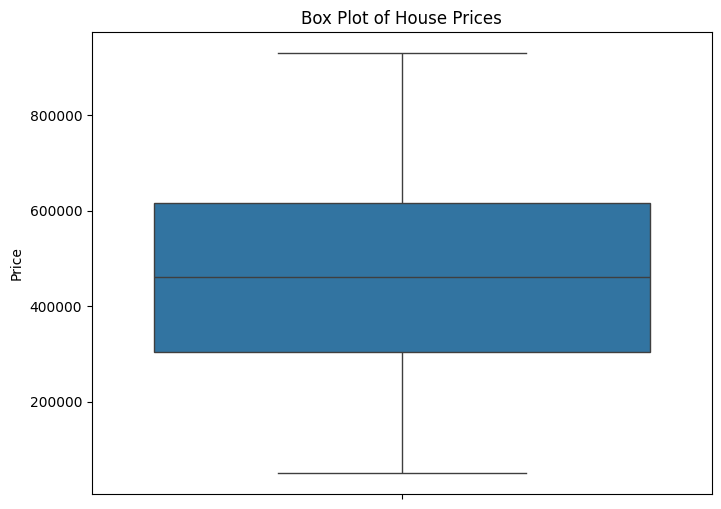

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Price'])
plt.title('Box Plot of House Prices')
plt.ylabel('Price')
plt.show()

In [14]:
df_values = [0,100,120,130,140,150,180,200,220,250,300]

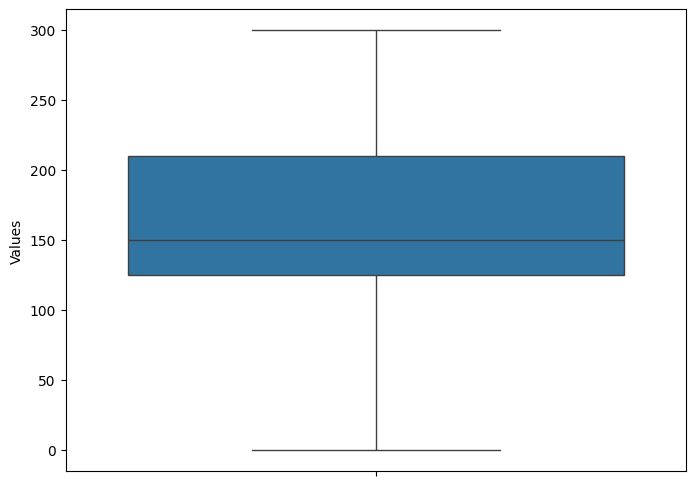

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_values)
plt.ylabel('Values')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')